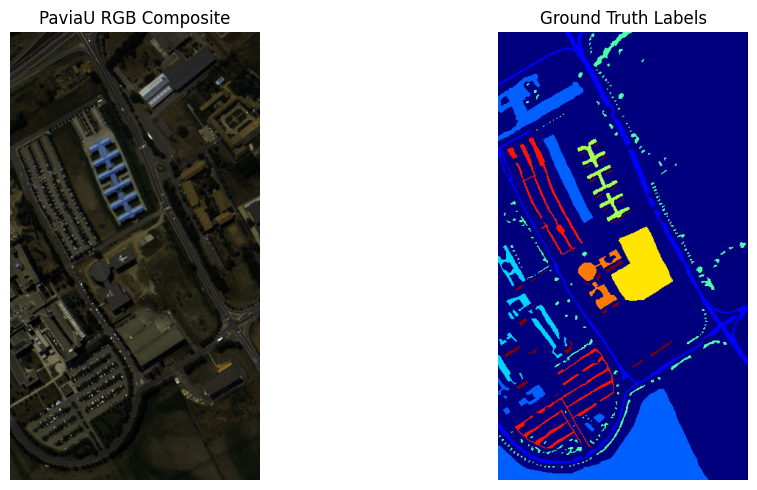

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

data = scipy.io.loadmat('./PaviaU.mat')['paviaU']
labels = scipy.io.loadmat('./PaviaU_gt.mat')['paviaU_gt']

rgb = data[:, :, [55, 41, 12]]
rgb = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb)
plt.title('PaviaU RGB Composite')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(labels, cmap='jet')
plt.title('Ground Truth Labels')
plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
print('shape of data :'  , np.shape(data))
print('shape of labels : ' , np.shape(labels))
np.count_nonzero(labels)



shape of data : (610, 340, 103)
shape of labels :  (610, 340)


42776

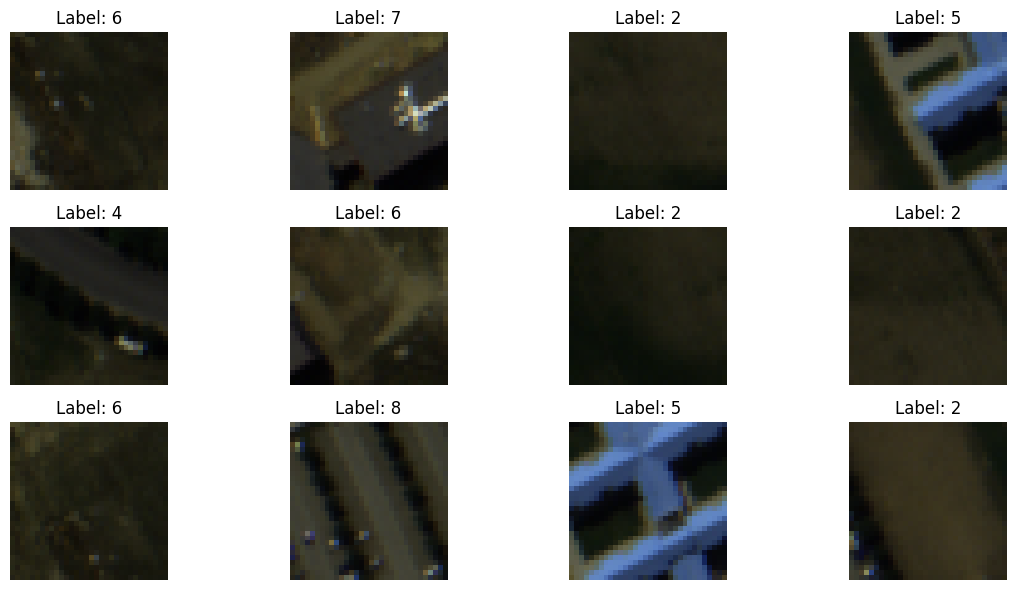

In [14]:

rgb_data = data[:, :, [55, 41, 12]]
rgb_data = (rgb_data - np.min(rgb_data)) / (np.max(rgb_data) - np.min(rgb_data))

h, w = labels.shape
patch_size = 32
valid_coords = [(i, j) for i in range(0, h - patch_size) for j in range(0, w - patch_size) if labels[i + patch_size//2, j + patch_size//2] != 0]
np.random.shuffle(valid_coords)
samples = valid_coords[:12]

plt.figure(figsize=(12, 6))
for idx, (i, j) in enumerate(samples):
    patch = rgb_data[i:i+patch_size, j:j+patch_size, :]
    plt.subplot(3, 4, idx + 1)
    plt.imshow(patch)
    plt.title(f'Label: {labels[i + patch_size//2, j + patch_size//2]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

h, w, bands = data.shape
X = data.reshape(-1, bands)
y = labels.flatten()

mask = y > 0
X = X[mask]
y = y[mask]

X = (X - X.min()) / (X.max() - X.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
np.shape('shape of the xtrain :' , X_train)
np


(29943, 103)